# Solution Reporting

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.dates as mdates

## Dataset Imports

In [2]:
df = pd.read_csv('BTCUSDT.csv')
pd.set_option('display.max_columns', None)
df.head(3)

timestamp     open     high      low    close    volume  \
0  2017-08-17 04:00:00  4261.48  4261.48  4261.48  4261.48  1.775183   
1  2017-08-17 04:01:00  4261.48  4261.48  4261.48  4261.48  0.000000   
2  2017-08-17 04:02:00  4280.56  4280.56  4280.56  4280.56  0.261074   

                close_time  quote_asset_volume  number_of_trades  \
0  2017-08-17 04:00:59.999         7564.906851                 3   
1  2017-08-17 04:01:59.999            0.000000                 0   
2  2017-08-17 04:02:59.999         1117.542921                 2   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                     0.075183                    320.390851       0  
1                     0.000000                      0.000000       0  
2                     0.261074                   1117.542921       0

# Preprocessing

### Shape of Data

In [5]:
print(df.shape)

(3916750, 12)


### Size of Data

In [8]:
print(df.shape)

(3916750, 12)


### Datatypes

In [6]:
print(df.dtypes)

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                       object
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
ignore                            int64
dtype: object


### Summary of statsitics

In [14]:
df.describe()

open         high          low        close       volume  \
count 3,916,750.00 3,916,750.00 3,916,750.00 3,916,750.00 3,916,750.00   
mean     27,897.15    27,911.48    27,882.67    27,897.16        47.07   
std      23,297.27    23,307.04    23,287.48    23,297.31        89.93   
min       2,830.00     2,830.00     2,817.00     2,817.00         0.00   
25%       8,592.40     8,599.98     8,585.00     8,592.60         9.83   
50%      20,556.01    20,568.99    20,542.90    20,556.02        21.10   
75%      42,625.99    42,643.50    42,608.94    42,626.00        47.08   
max     109,185.87   109,588.00   108,945.08   109,194.17     5,877.78   

       quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
count        3,916,750.00      3,916,750.00                 3,916,750.00   
mean         1,205,871.93          1,148.63                        23.40   
std          2,362,481.92          1,954.35                        45.85   
min                  0.00              0.00                         0.00   
25%            140,357.14            192.00                         4.36   
50%            454,135.41            504.00                        10.11   
75%          1,340,445.30          1,205.00                        23.51   
max        259,850,148.73        149,713.00                     3,537.45   

       taker_buy_quote_asset_volume       ignore  
count                  3,916,750.00 3,916,750.00  
mean                     597,246.52         0.00  
std                    1,223,004.00         0.00  
min                            0.00         0.00  
25%                       60,422.31         0.00  
50%                      208,164.99         0.00  
75%                      653,667.99         0.00  
max                  100,418,248.88         0.00

### Missing values

In [9]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [12]:
df.isnull()

timestamp   open   high    low  close  volume  close_time  \
0            False  False  False  False  False   False       False   
1            False  False  False  False  False   False       False   
2            False  False  False  False  False   False       False   
3            False  False  False  False  False   False       False   
4            False  False  False  False  False   False       False   
...            ...    ...    ...    ...    ...     ...         ...   
3916745      False  False  False  False  False   False       False   
3916746      False  False  False  False  False   False       False   
3916747      False  False  False  False  False   False       False   
3916748      False  False  False  False  False   False       False   
3916749      False  False  False  False  False   False       False   

         quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0                     False             False                        False   
1                     False             False                        False   
2                     False             False                        False   
3                     False             False                        False   
4                     False             False                        False   
...                     ...               ...                          ...   
3916745               False             False                        False   
3916746               False             False                        False   
3916747               False             False                        False   
3916748               False             False                        False   
3916749               False             False                        False   

         taker_buy_quote_asset_volume  ignore  
0                               False   False  
1                               False   False  
2                               False   False  
3                               False   False  
4                               False   False  
...                               ...     ...  
3916745                         False   False  
3916746                         False   False  
3916747                         False   False  
3916748                         False   False  
3916749                         False   False  

[3916750 rows x 12 columns]

# EDA

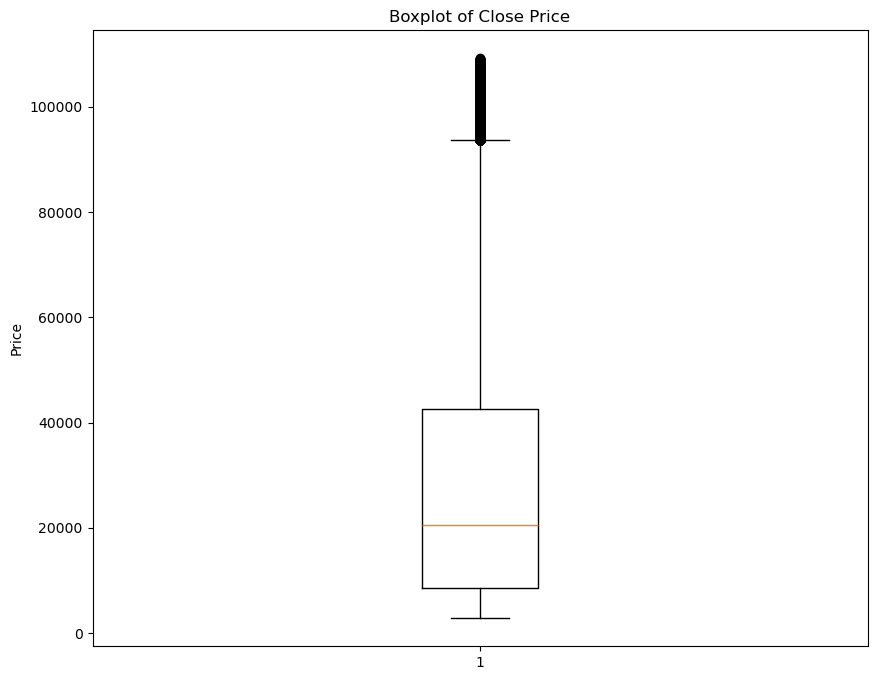

In [14]:
#Boxplot for overall rating.
plt.figure(figsize=(10, 8))
plt.boxplot(df['close'])
plt.title('Boxplot of Close Price')
plt.ylabel('Price')
plt.show()


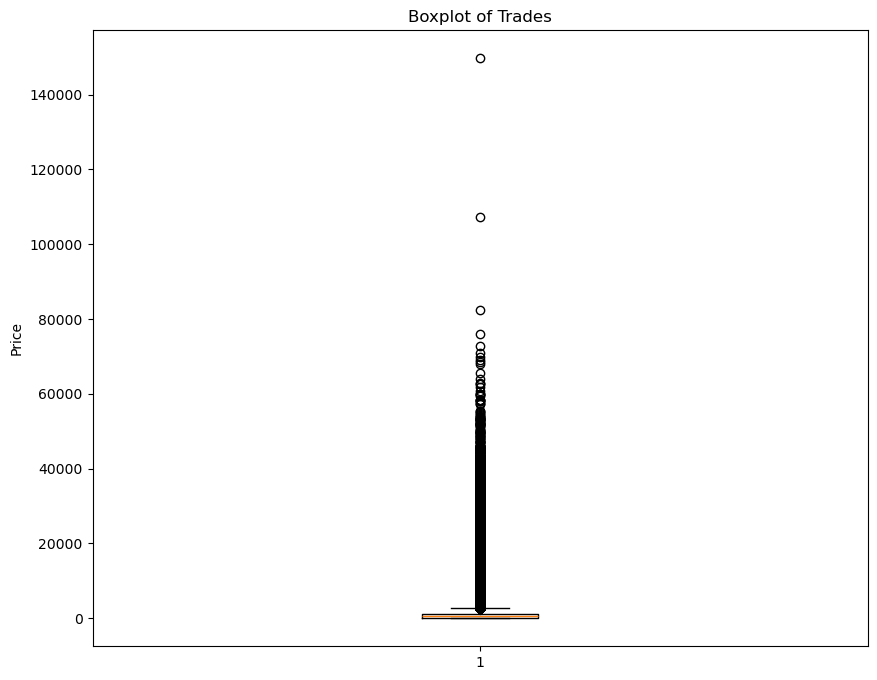

In [15]:
#Boxplot for overall rating.
plt.figure(figsize=(10, 8))
plt.boxplot(df['number_of_trades'])
plt.title('Boxplot of Trades')
plt.ylabel('Price')
plt.show()


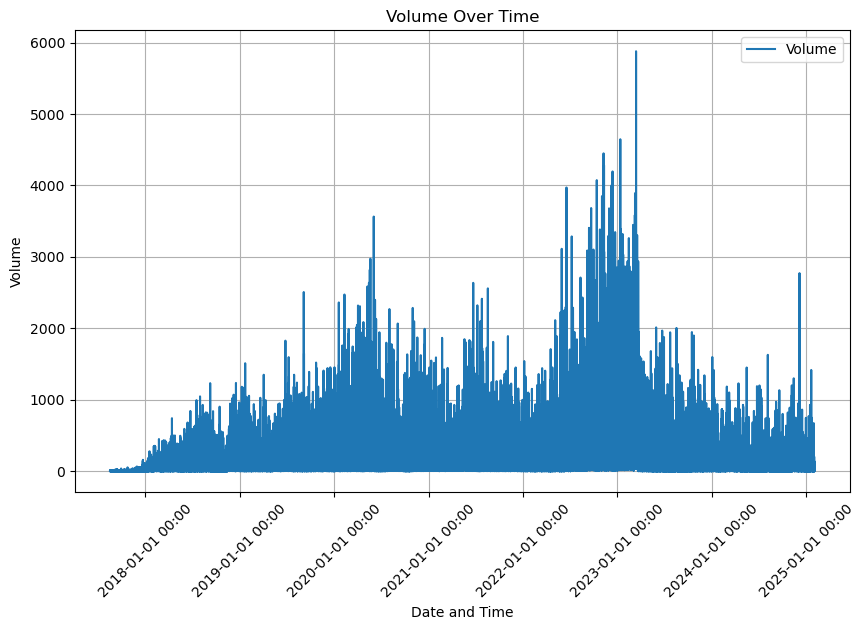

In [7]:
# Convert the timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with NaN values in the timestamp column
df.dropna(subset=['timestamp'], inplace=True)

# Filter out timestamps that are outside the valid range
df = df[(df['timestamp'] >= pd.Timestamp('0001-01-01')) & (df['timestamp'] <= pd.Timestamp('9999-12-31'))]

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Plot the volume over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['volume'], label='Volume')

# Format the x-axis to show date-time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Label axes
plt.xlabel('Date and Time')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid and plot
plt.grid(True)
plt.show()


### Line charts

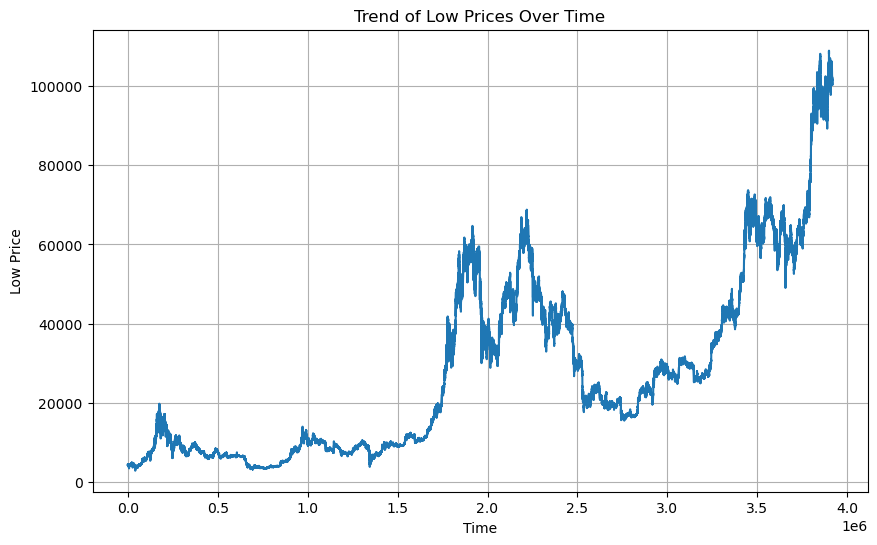

In [16]:
# Plot as a line chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['low'])

# Label axes
plt.xlabel("Time")
plt.ylabel("Low Price")
plt.title("Trend of Low Prices Over Time")

plt.grid(True)
plt.show()

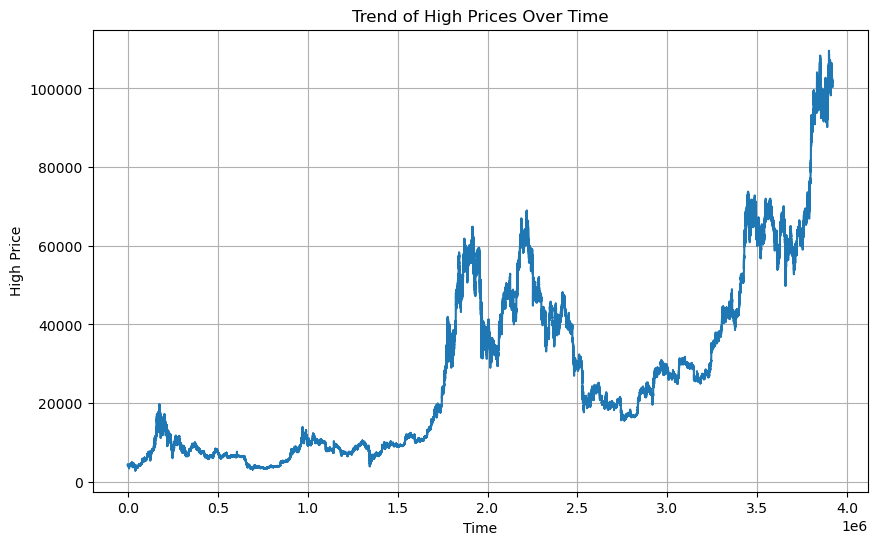

In [17]:

# Plot as a line chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['high'])

# Label axes
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("Trend of High Prices Over Time")

plt.grid(True)
plt.show()

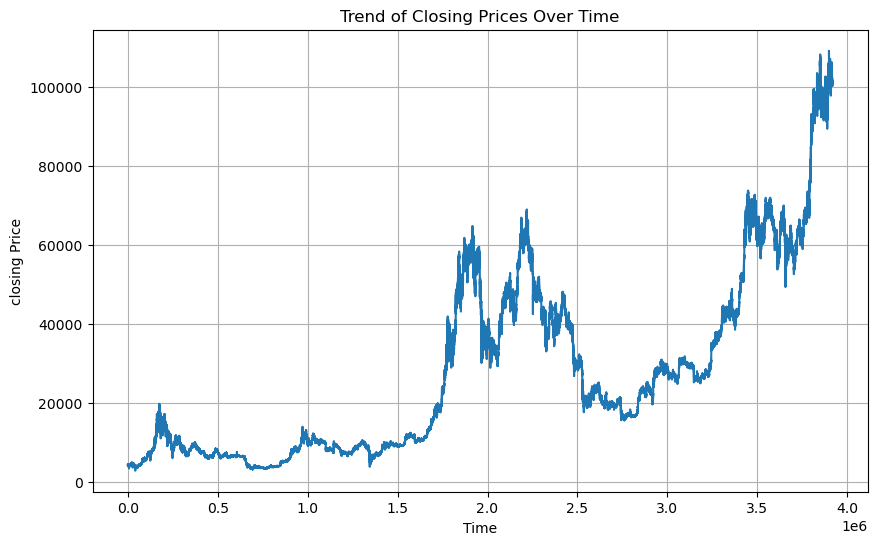

In [8]:

# Plot as a line chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['close'])

# Label axes
plt.xlabel("Time")
plt.ylabel("closing Price")
plt.title("Trend of Closing Prices Over Time")

# Show grid and plot
plt.grid(True)
plt.show()

### Trade Volume

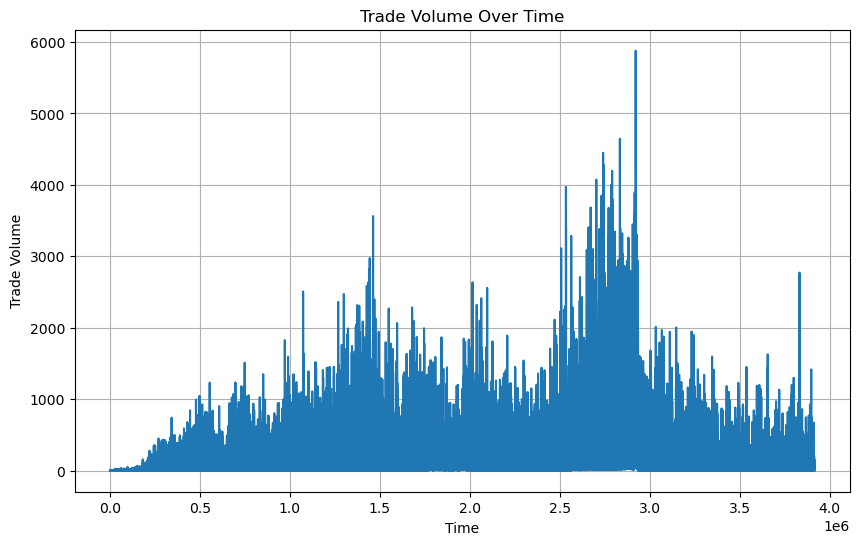

In [9]:

# Plot as a line chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['volume'])

# Label axes
plt.xlabel("Time")
plt.ylabel("Trade Volume")
plt.title("Trade Volume Over Time")

# Show grid and plot
plt.grid(True)
plt.show()

### Distribution

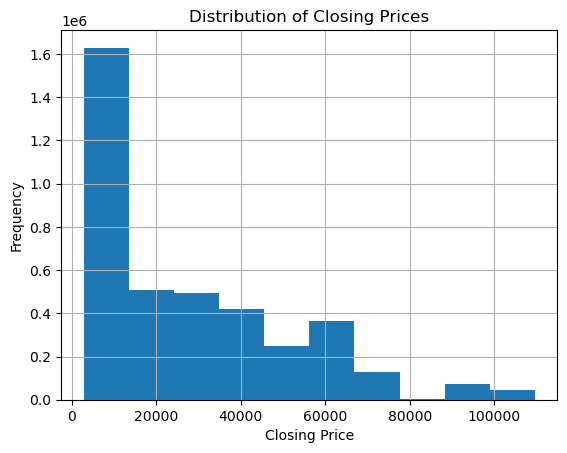

In [12]:
df['high'].hist()
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()


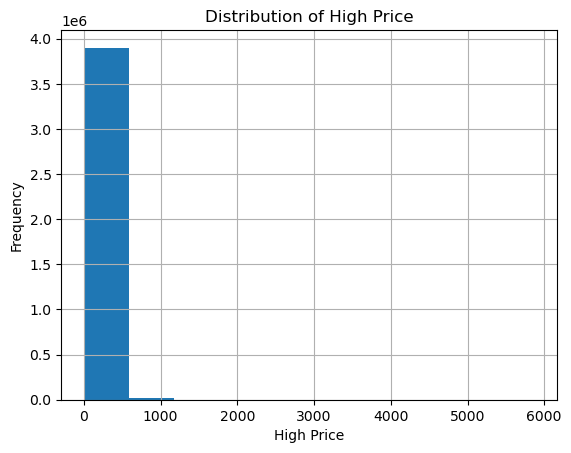

In [20]:
df['volume'].hist()
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()

[[<Axes: title={'center': 'number_of_trades'}>]]


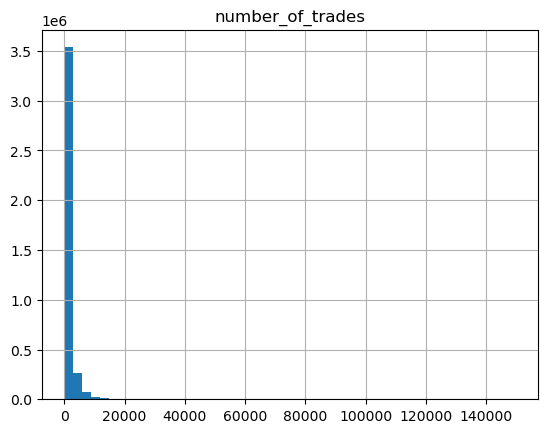

In [24]:
hist_time = df.hist(column='number_of_trades', bins=50)
print(hist_time)

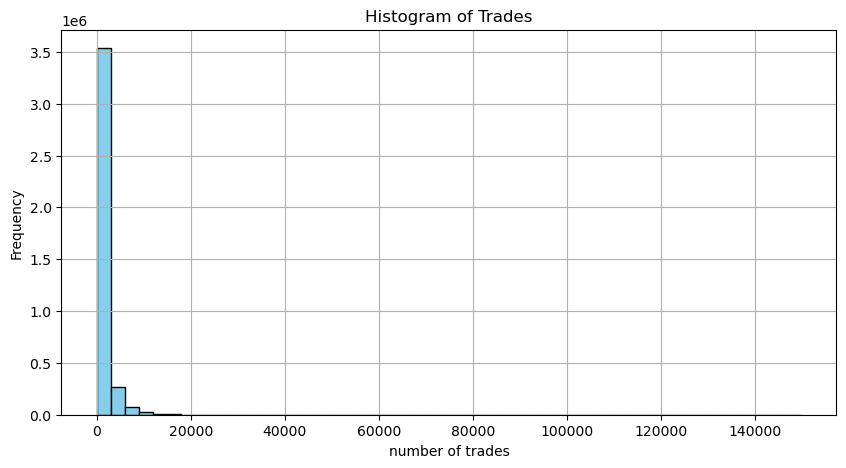

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df['number_of_trades'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('number of trades')
plt.ylabel('Frequency')
plt.title('Histogram of Trades')
plt.grid(True)
plt.show()

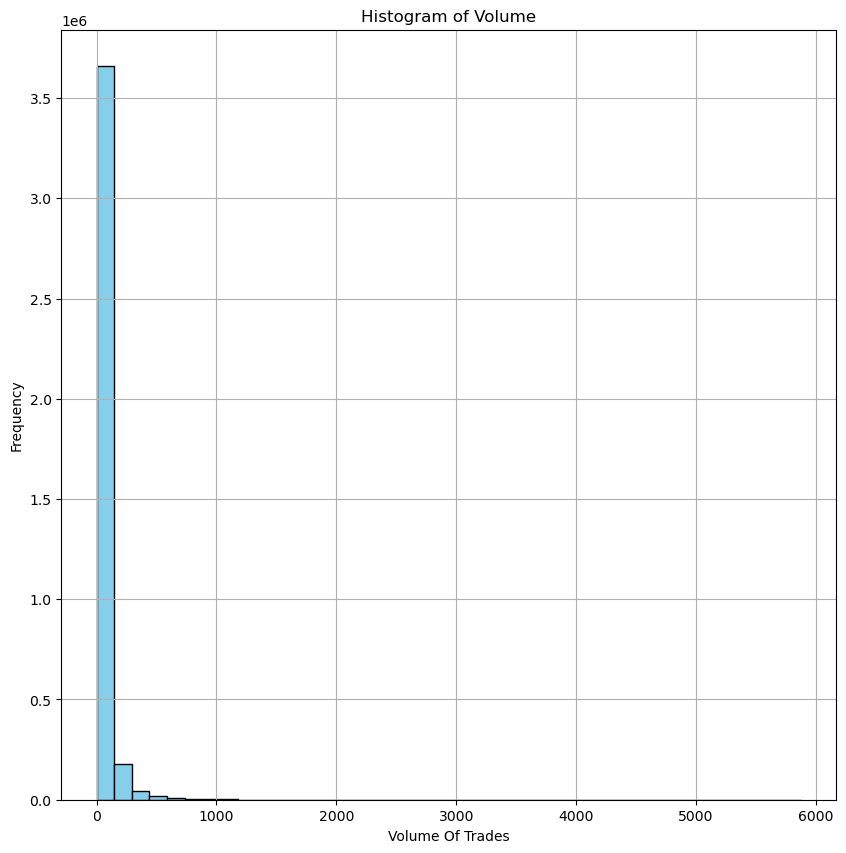

In [29]:
plt.figure(figsize=(10, 10))
plt.hist(df['volume'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Volume Of Trades')
plt.ylabel('Frequency')
plt.title('Histogram of Volume')
plt.grid(True)
plt.show()

### Line chart

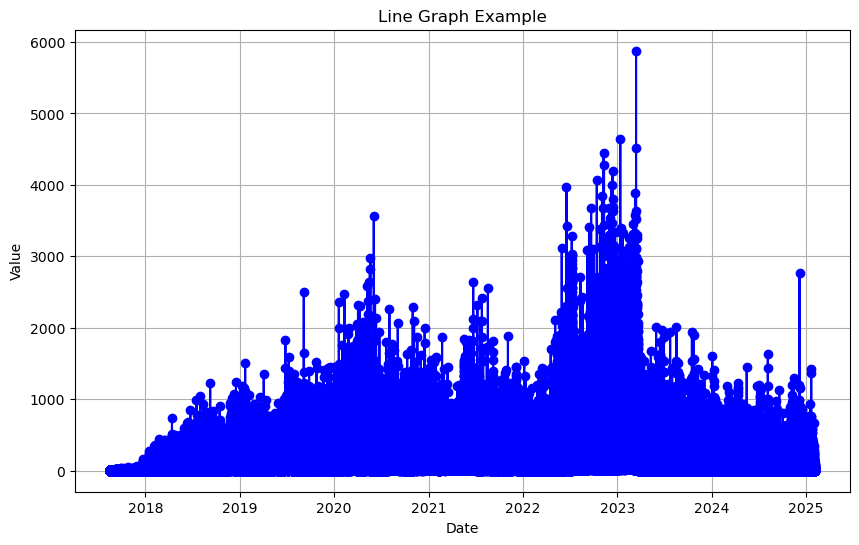

In [34]:


# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['timestamp'])

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['volume'], marker='o', linestyle='-', color='b')
plt.title('Line Graph Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


### Correlation

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['close_time'] = pd.to_datetime(df['close_time'])

df_numerical = df

#work out the perarson and spearmen correlation
pearson_corr = df_numerical.corr(method='pearson')
spearman_corr = df_numerical.corr(method='spearman')

#print out correlation
print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

Pearson Correlation:
                               timestamp  open  high   low  close  volume  \
timestamp                          1.00  0.77  0.77  0.77   0.77    0.12   
open                               0.77  1.00  1.00  1.00   1.00   -0.05   
high                               0.77  1.00  1.00  1.00   1.00   -0.05   
low                                0.77  1.00  1.00  1.00   1.00   -0.05   
close                              0.77  1.00  1.00  1.00   1.00   -0.05   
volume                             0.12 -0.05 -0.05 -0.05  -0.05    1.00   
close_time                         1.00  0.77  0.77  0.77   0.77    0.12   
quote_asset_volume                 0.28  0.23  0.23  0.23   0.23    0.84   
number_of_trades                   0.39  0.29  0.29  0.28   0.29    0.76   
taker_buy_base_asset_volume        0.12 -0.05 -0.05 -0.05  -0.05    0.96   
taker_buy_quote_asset_volume       0.27  0.22  0.22  0.22   0.22    0.80   
ignore                              NaN   NaN   NaN   NaN    NaN  

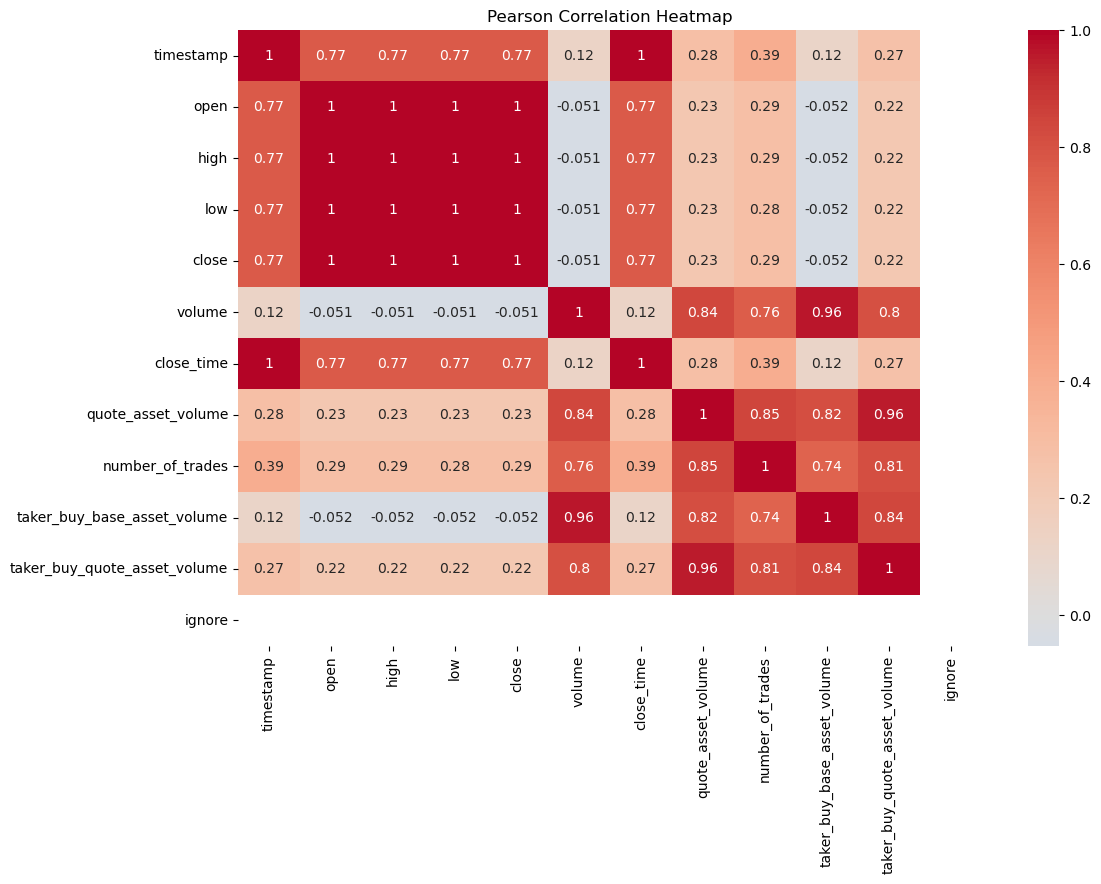

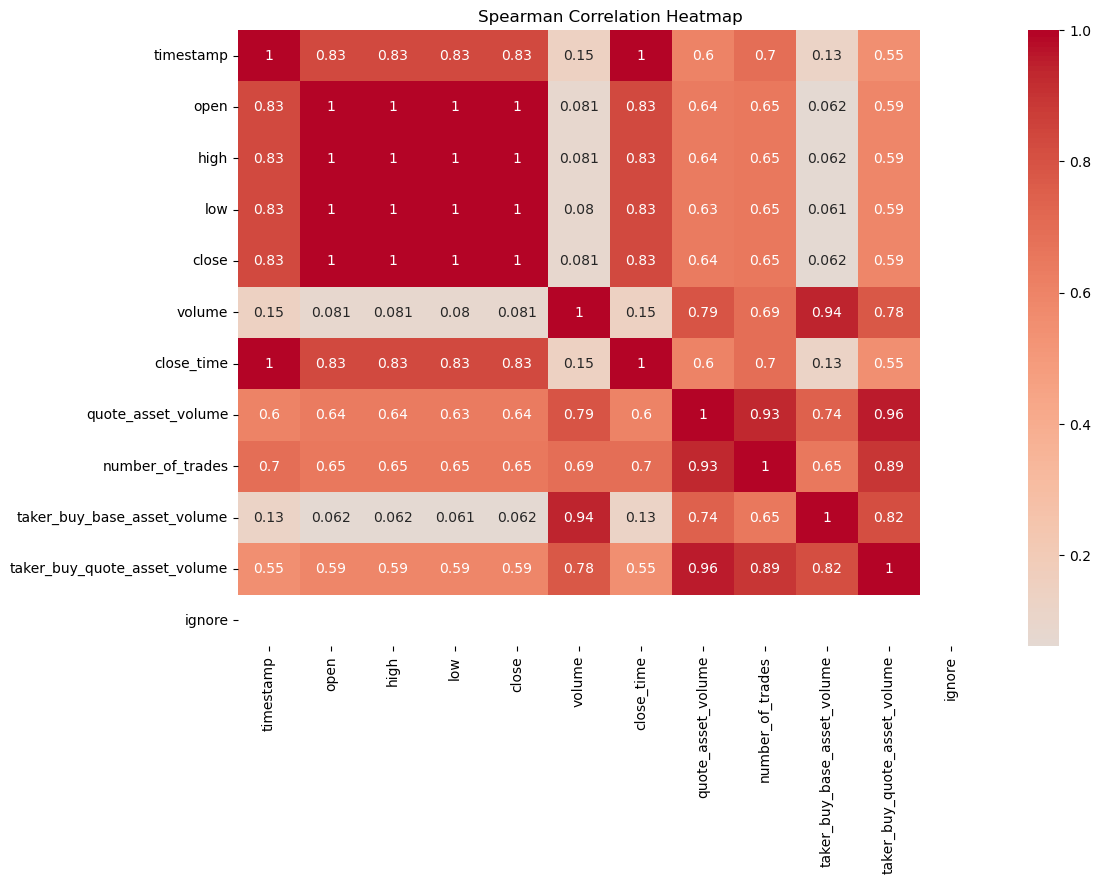

In [21]:
#display heat map for the correlations.
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

### Scatter plot matrix

In [3]:
new_df= df.drop(columns = ["ignore","open","high","low","close_time"])
new_df.head(3)

timestamp    close    volume  quote_asset_volume  \
0  2017-08-17 04:00:00  4261.48  1.775183         7564.906851   
1  2017-08-17 04:01:00  4261.48  0.000000            0.000000   
2  2017-08-17 04:02:00  4280.56  0.261074         1117.542921   

   number_of_trades  taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
0                 3                     0.075183                    320.390851  
1                 0                     0.000000                      0.000000  
2                 2                     0.261074                   1117.542921

array([[<Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>,
        <Axes: xlabel='quote_asset_volume', ylabel='close'>,
        <Axes: xlabel='number_of_trades', ylabel='close'>,
        <Axes: xlabel='taker_buy_base_asset_volume', ylabel='close'>,
        <Axes: xlabel='taker_buy_quote_asset_volume', ylabel='close'>],
       [<Axes: xlabel='close', ylabel='volume'>,
        <Axes: xlabel='volume', ylabel='volume'>,
        <Axes: xlabel='quote_asset_volume', ylabel='volume'>,
        <Axes: xlabel='number_of_trades', ylabel='volume'>,
        <Axes: xlabel='taker_buy_base_asset_volume', ylabel='volume'>,
        <Axes: xlabel='taker_buy_quote_asset_volume', ylabel='volume'>],
       [<Axes: xlabel='close', ylabel='quote_asset_volume'>,
        <Axes: xlabel='volume', ylabel='quote_asset_volume'>,
        <Axes: xlabel='quote_asset_volume', ylabel='quote_asset_volume'>,
        <Axes: xlabel='number_of_trades', ylabel='quote_asset_volume'>,
       

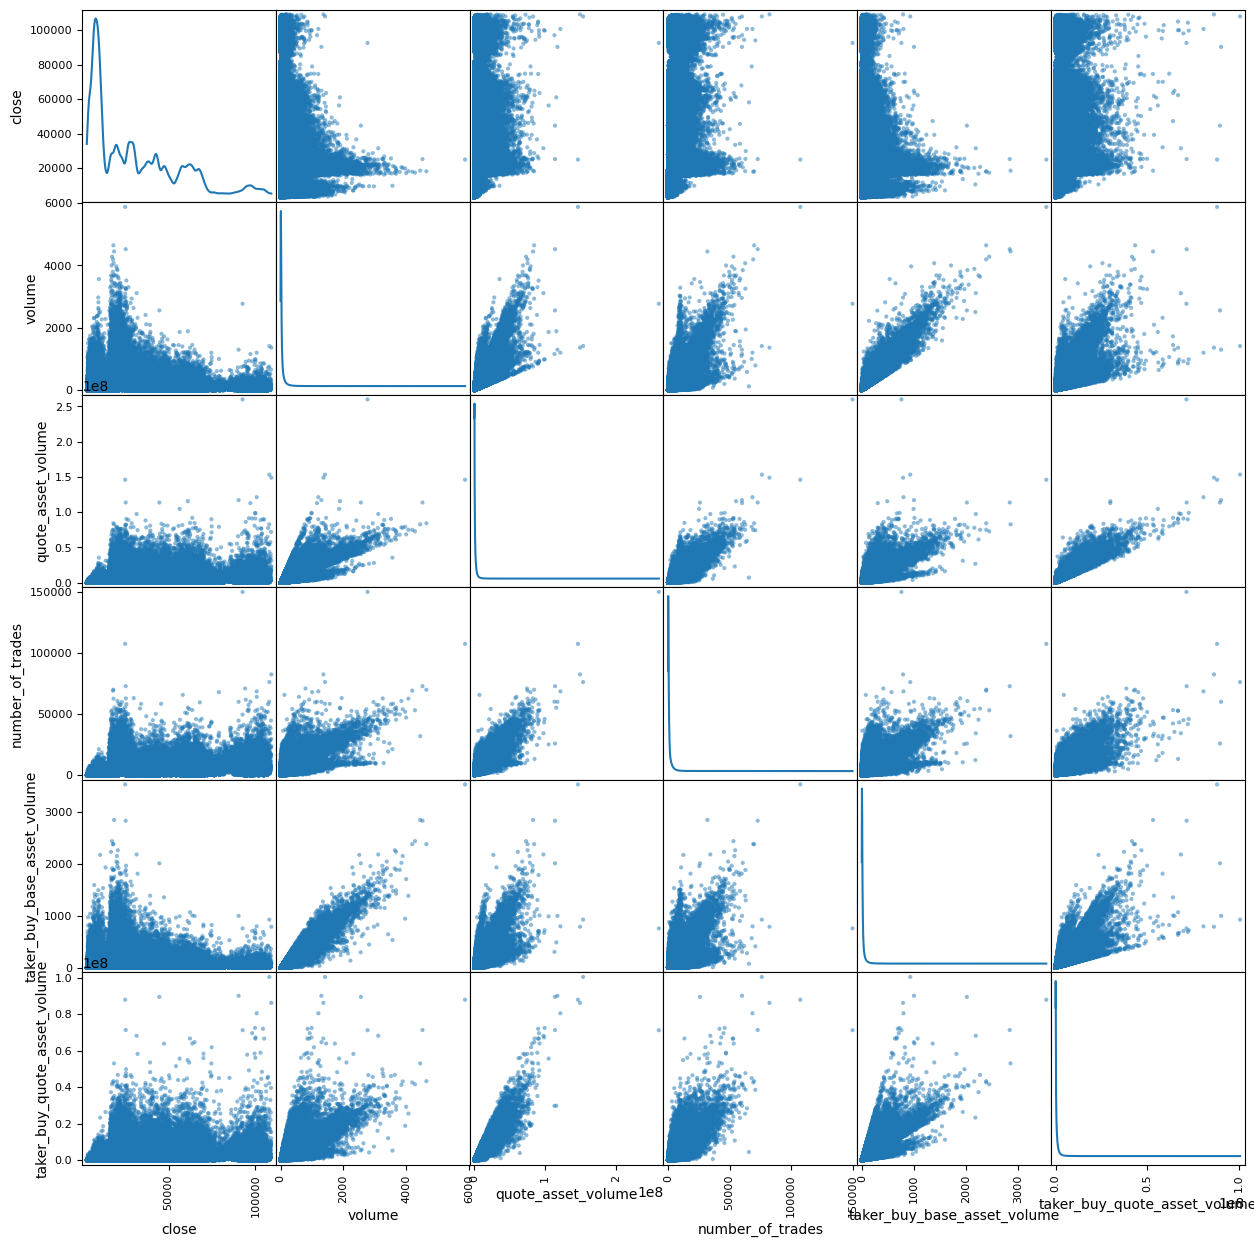

In [5]:
pd.plotting.scatter_matrix(new_df, figsize=(15, 15), diagonal='kde')

# ARIMA Model

In [4]:
import io

from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing

from pandas.plotting import autocorrelation_plot

import matplotlib.pylab as plt #for visualization
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib.pylab import rcParams
from matplotlib import colors

#for making sure matplotlib plots are generated in codlab notebook itself
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox

rcParams['figure.figsize'] = 10, 6

import warnings
warnings.filterwarnings('ignore')


In [5]:
new_df= new_df.drop(columns = ["volume","quote_asset_volume","number_of_trades","taker_buy_base_asset_volume","taker_buy_quote_asset_volume"])

In [24]:
#Rename dataset columns and Parse strings to datetime type and
df_downsampled['timestamp'] = pd.to_datetime(df_downsampled['timestamp'], infer_datetime_format=True) #convert from string to datetime
df_downsampled = df_downsampled.set_index(['timestamp'])
df_downsampled.head(5)

close
timestamp                   
2017-08-17 04:00:00  4261.48
2017-08-17 06:55:00  4324.35
2017-08-17 09:50:00  4444.00
2017-08-17 12:45:00  4431.13
2017-08-17 15:40:00  4377.54

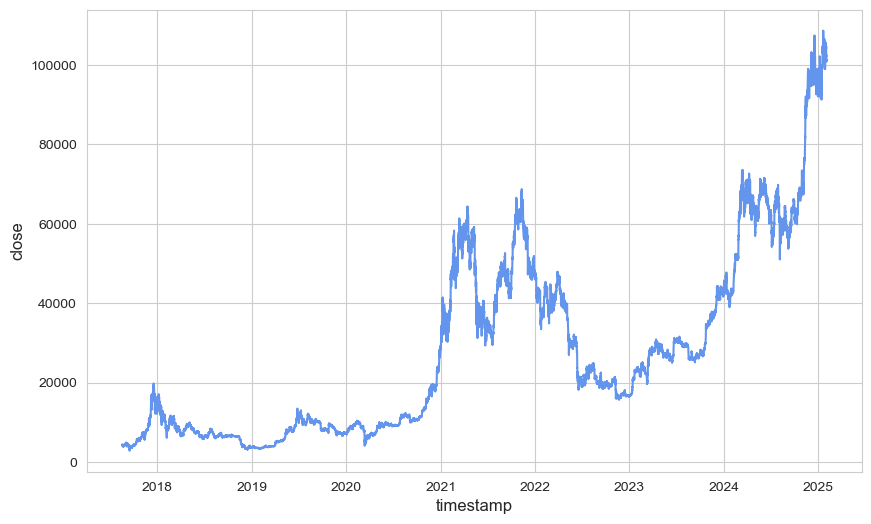

In [16]:
#plot time graph
plt.plot(df_downsampled, color = 'cornflowerblue')
plt.xlabel('timestamp', size = 12)
plt.ylabel('close', size = 12)

plt.show()

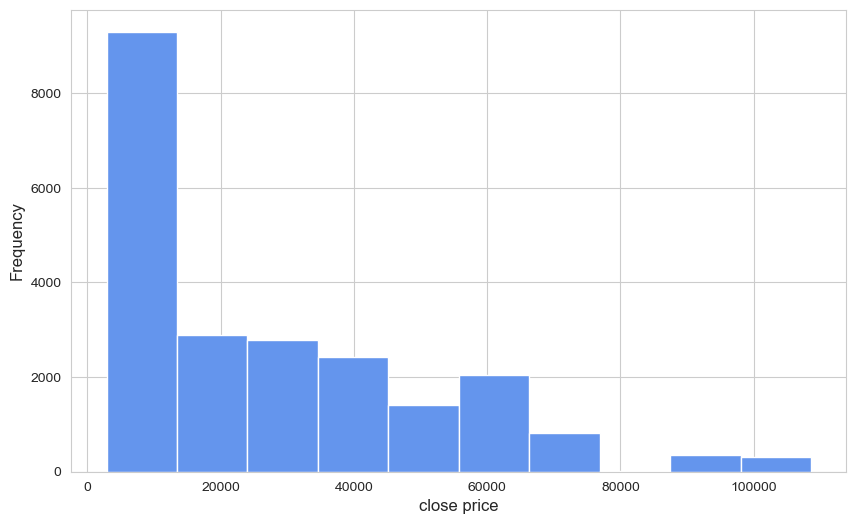

In [17]:
#plot the frequency graph

plt.hist(df_downsampled['close'], color = 'cornflowerblue')
plt.xlabel('close price', size = 12)
plt.ylabel('Frequency', size = 12)

plt.show()

### Determining and Plotting Rolling Statistics

                             close
timestamp                         
2017-08-17 04:00:00            NaN
2017-08-17 06:55:00            NaN
2017-08-17 09:50:00            NaN
2017-08-17 12:45:00            NaN
2017-08-17 15:40:00            NaN
...                            ...
2025-02-01 14:06:00  103111.238333
2025-02-01 17:01:00  102928.606667
2025-02-01 19:56:00  102725.919167
2025-02-01 22:51:00  102414.969167
2025-02-02 01:46:00  102164.249167

[22382 rows x 1 columns]                            close
timestamp                       
2017-08-17 04:00:00          NaN
2017-08-17 06:55:00          NaN
2017-08-17 09:50:00          NaN
2017-08-17 12:45:00          NaN
2017-08-17 15:40:00          NaN
...                          ...
2025-02-01 14:06:00  1160.093777
2025-02-01 17:01:00  1126.368869
2025-02-01 19:56:00  1116.537709
2025-02-01 22:51:00  1080.819587
2025-02-02 01:46:00   933.794758

[22382 rows x 1 columns]


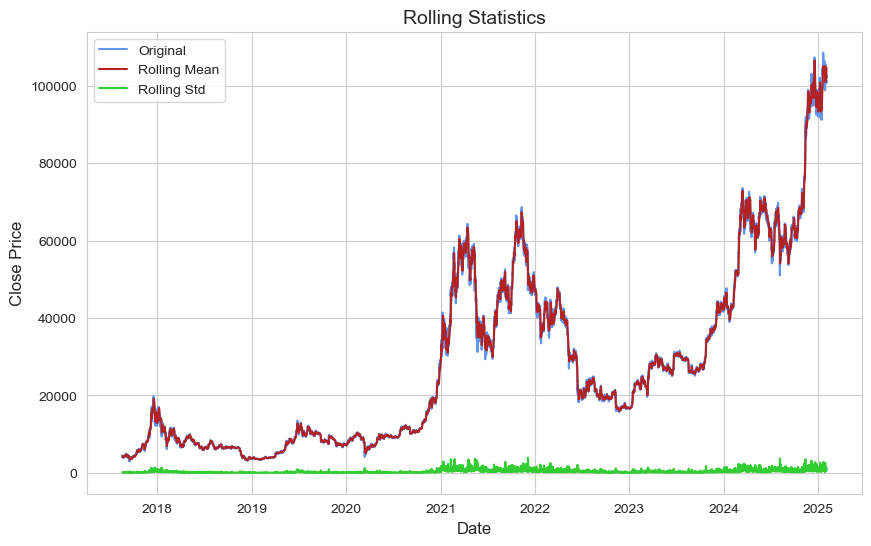

In [18]:
rolling_mean = df_downsampled.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolling_std = df_downsampled.rolling(window=12).std()
print(rolling_mean, rolling_std)

#plot rolling statistics
plt.plot(df_downsampled, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Close Price', size  = 12)
plt.legend(loc='best')
plt.title('Rolling Statistics', size = 14)

plt.show()

In [19]:
df_downsampled = new_df.iloc[::175, :]

df_test = adfuller(df_downsampled['close'], autolag='AIC')

df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value

print(df_output)

Test Statistic                     0.531514
p-value                            0.985800
#Lags Used                        33.000000
Number of Observations Used    22348.000000
Critical Value (1%)               -3.430643
Critical Value (5%)               -2.861669
Critical Value (10%)              -2.566839
dtype: float64


In [25]:
def adfuller_test(timeseries, transformation_type, window = 12):
    movingAverage = timeseries.rolling(window).mean()
    movingSTD = timeseries.rolling(window).std()

    orig = plt.plot(timeseries, color='cornflowerblue', label='Original')
    mean = plt.plot(movingAverage, color='firebrick', label='Rolling Mean')
    std = plt.plot(movingSTD, color='limegreen', label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title(f'{transformation_type} Rolling Statistics', size = 14)
    plt.show(block=False)

    adf = adfuller(timeseries, autolag='AIC')

    print(f'ADF Statistic: {adf[0]:.3}')
    print(f'p-value: {adf[1]:.3}')
    print(f'#Lags Used: {adf[2]}')
    print(f'#Number of Observations Used: {adf[3]}')
    print("##################################")
    print('Critical Values:')

    for key, ts in adf[4].items():
         print(f'{key}: {ts:.3}')
    print("##################################")

    if adf[0] > adf[4]["5%"]:
        print("ADF > Critical Values")
        print ("Failed to reject null hypothesis, time series is non-stationary.")
    else:
        print("ADF < Critical Values")
        print ("Reject null hypothesis, time series is stationary.")

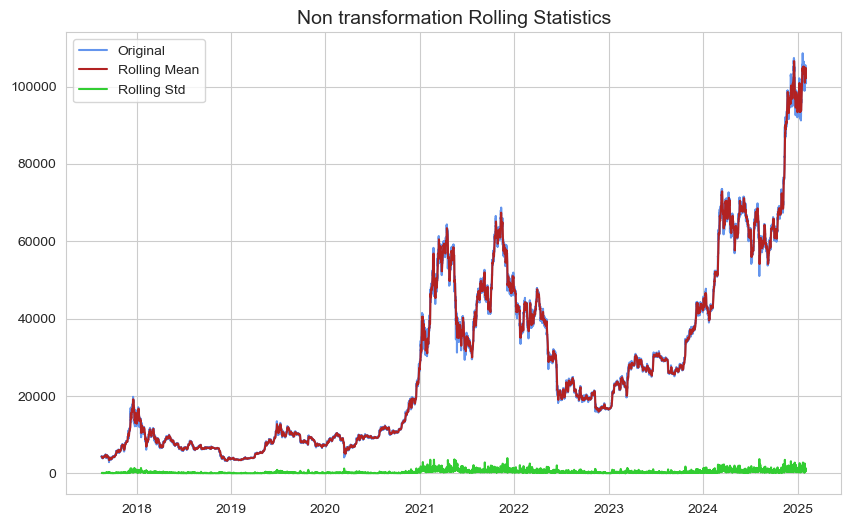

ADF Statistic: 0.532
p-value: 0.986
#Lags Used: 33
#Number of Observations Used: 22348
##################################
Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57
##################################
ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.


In [26]:
adfuller_test(df_downsampled , 'Non transformation')

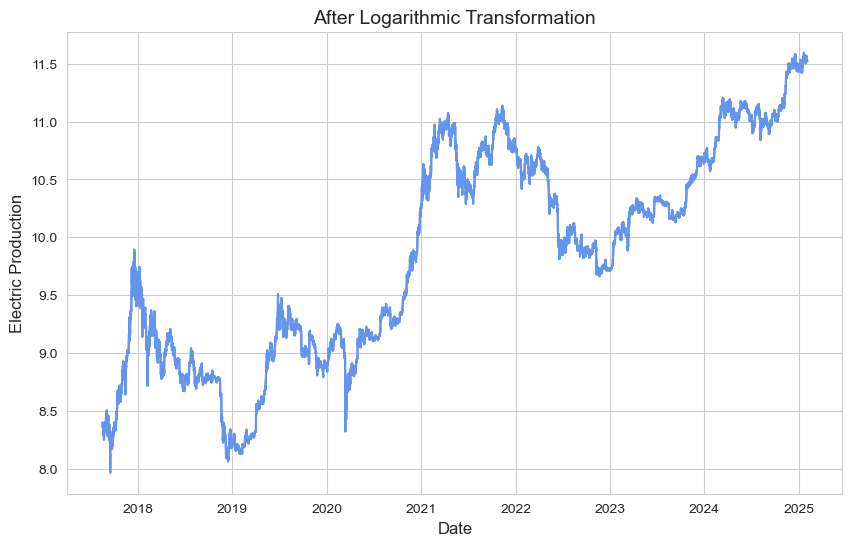

In [28]:
indexed_df_log_scaled = np.log(df_downsampled)

plt.plot(indexed_df_log_scaled, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("After Logarithmic Transformation", size = 14)

plt.show()

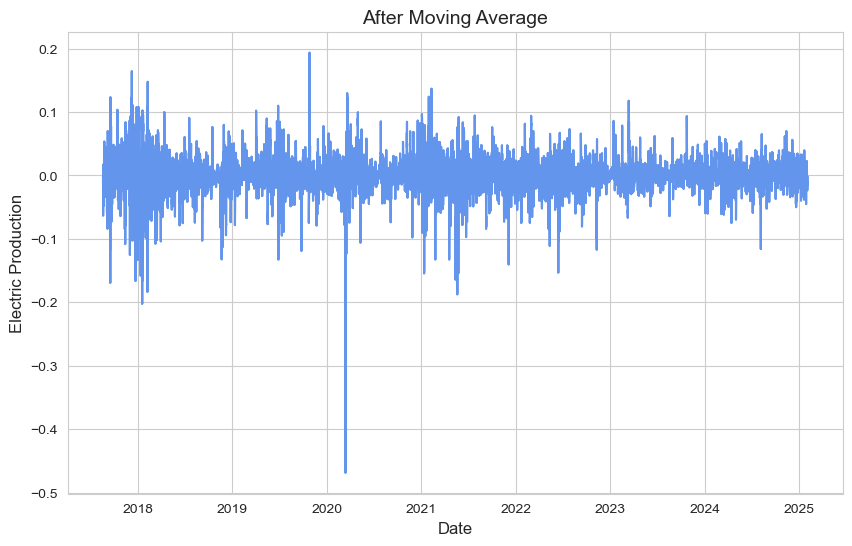

In [30]:
moving_avg = indexed_df_log_scaled.rolling(window=12).mean()
indexed_df_log_scaled_ma = indexed_df_log_scaled - moving_avg

indexed_df_log_scaled_ma.dropna(inplace=True) #Remove NAN values

plt.plot(indexed_df_log_scaled_ma, color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("After Moving Average", size = 14)

plt.show()

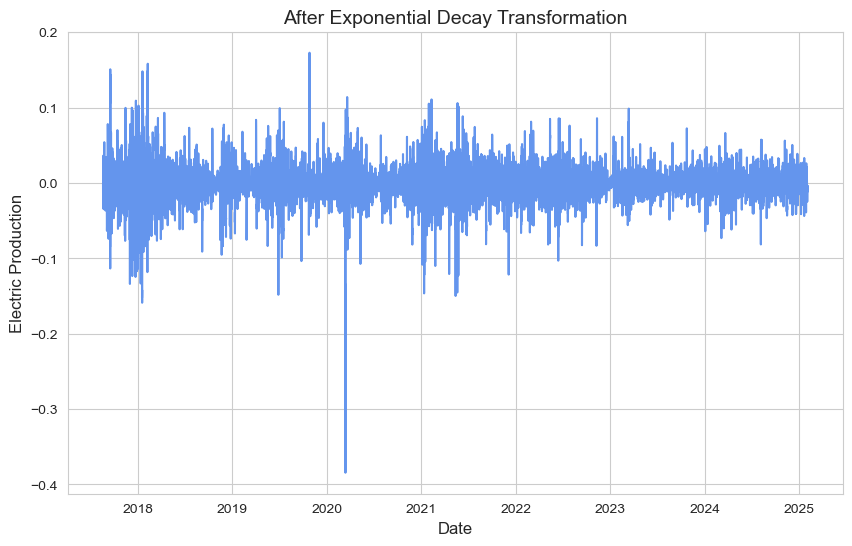

In [44]:
indexed_df_log_scaled_ma_ed = indexed_df_log_scaled_ma.ewm(halflife=12, min_periods=0, adjust=True).mean()
indexed_df_log_scaled_minus_ma_ed = indexed_df_log_scaled_ma - indexed_df_log_scaled_ma_ed

plt.plot(indexed_df_log_scaled_minus_ma_ed, color='cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("After Exponential Decay Transformation", size = 14)

plt.show()

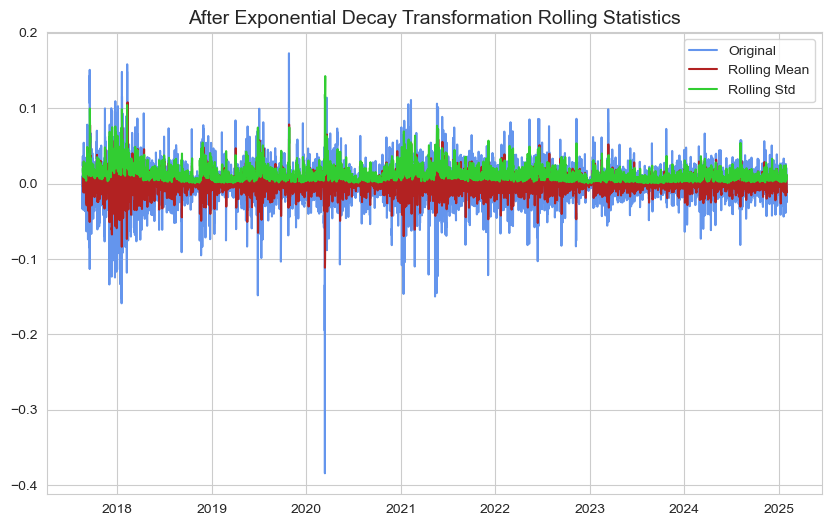

ADF Statistic: -27.0
p-value: 0.0
#Lags Used: 46
#Number of Observations Used: 22324
##################################
Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57
##################################
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [45]:
adfuller_test(indexed_df_log_scaled_minus_ma_ed, "After Exponential Decay Transformation", window = 12)

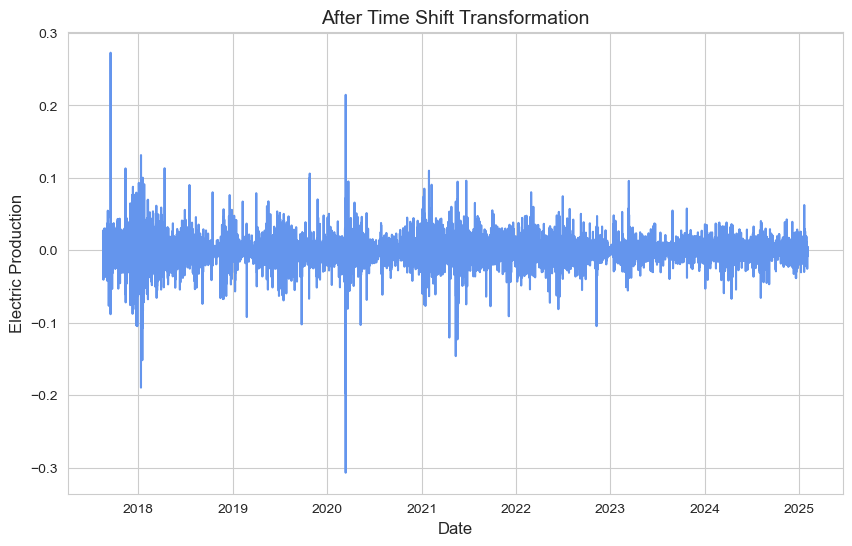

In [46]:
indexed_df_log_scaled_shift = indexed_df_log_scaled - indexed_df_log_scaled.shift()

plt.plot(indexed_df_log_scaled_shift, color='cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.title("After Time Shift Transformation", size = 14)

plt.show()

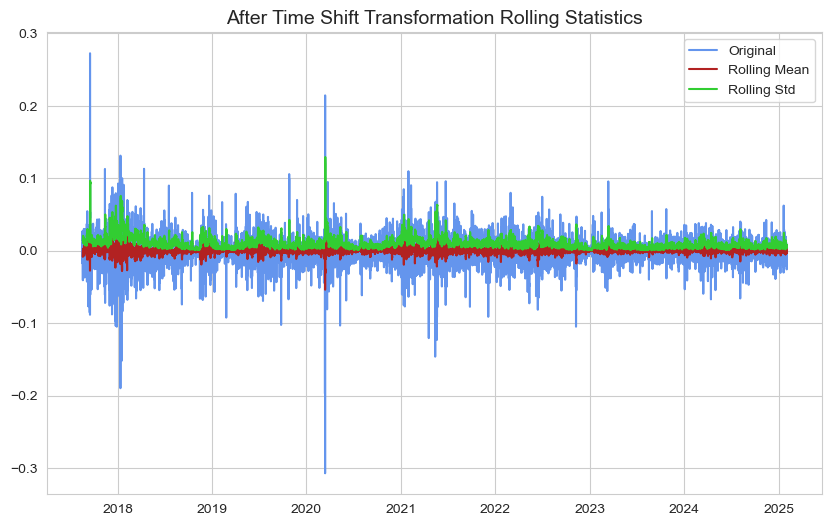

ADF Statistic: -20.8
p-value: 0.0
#Lags Used: 47
#Number of Observations Used: 22333
##################################
Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57
##################################
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [36]:
indexed_df_log_scaled_shift.dropna(inplace=True) #Remove NAN values
adfuller_test(indexed_df_log_scaled_shift, "After Time Shift Transformation", window = 12)

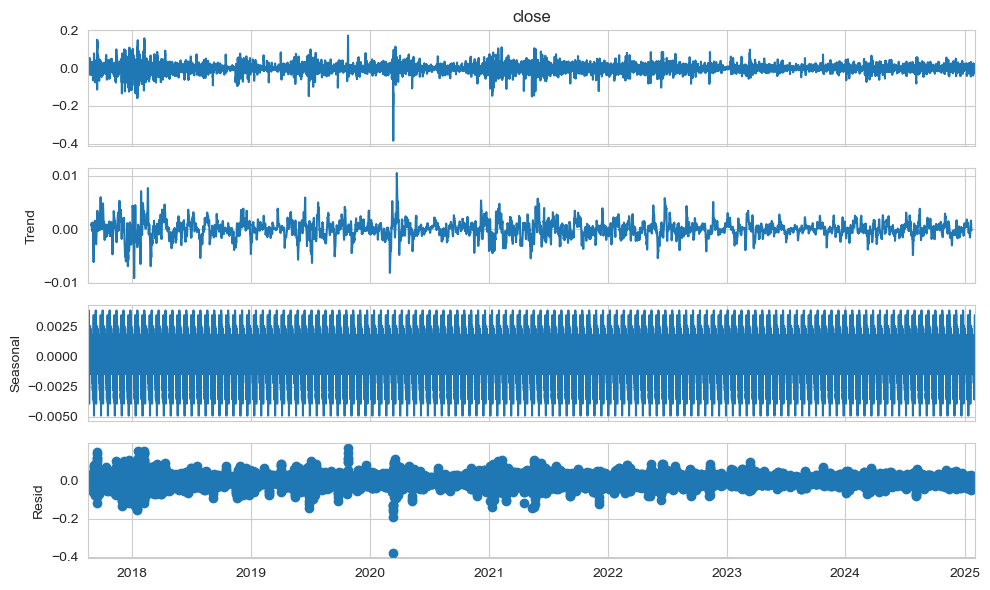

In [59]:
period = 175
indexed_df_seasonal_decompose = seasonal_decompose(indexed_df_log_scaled_minus_ma_ed["close"],period= period)

indexed_df_seasonal_decompose.plot()
plt.tight_layout()
plt.show()

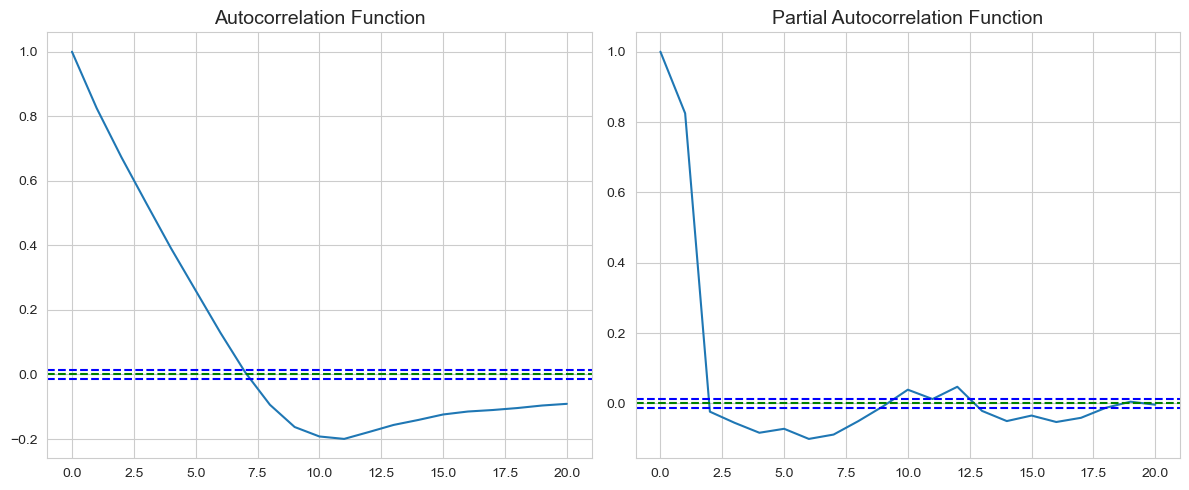

In [60]:
auto_c_f = acf(indexed_df_log_scaled_minus_ma_ed, nlags=20)
partial_auto_c_f = pacf(indexed_df_log_scaled_minus_ma_ed, nlags=20, method='ols')

fig, axs = plt.subplots(1, 2, figsize =(12,5))

# plot ACF
plt.subplot(121)
plt.plot(auto_c_f)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(indexed_df_log_scaled_minus_ma_ed)),linestyle='--', color='blue')
plt.axhline(y=1.96/np.sqrt(len(indexed_df_log_scaled_minus_ma_ed)),linestyle='--', color='blue')
plt.title('Autocorrelation Function', size = 14)

plt.subplot(122)
plt.plot(partial_auto_c_f)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(indexed_df_log_scaled_minus_ma_ed)), linestyle='--', color='blue')
plt.axhline(y=1.96/np.sqrt(len(indexed_df_log_scaled_minus_ma_ed)),linestyle='--', color='blue')
plt.title('Partial Autocorrelation Function', size = 14)

plt.tight_layout()
plt.show()

### p=2 and q=7

In [120]:
ar_values = indexed_df_log_scaled_minus_ma_ed.values

#Split the data into two part such that our models can be used
#to predict the last 10 days of electric production in the dataset given all prior observations
train = ar_values[1:len(ar_values)-10]
test = ar_values[len(ar_values)-10:]

#Build the AR model
# from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,0))
AR_model = model.fit()

#Predict the electric production for the next 10 days
predictions = AR_model.predict(start=len(train), end=len(train) + len(test)-1, dynamic=False)
ar_score = mean_squared_error(test, predictions)
print(f'AR MSE: {ar_score:.4}')

AR MSE: 0.0001874


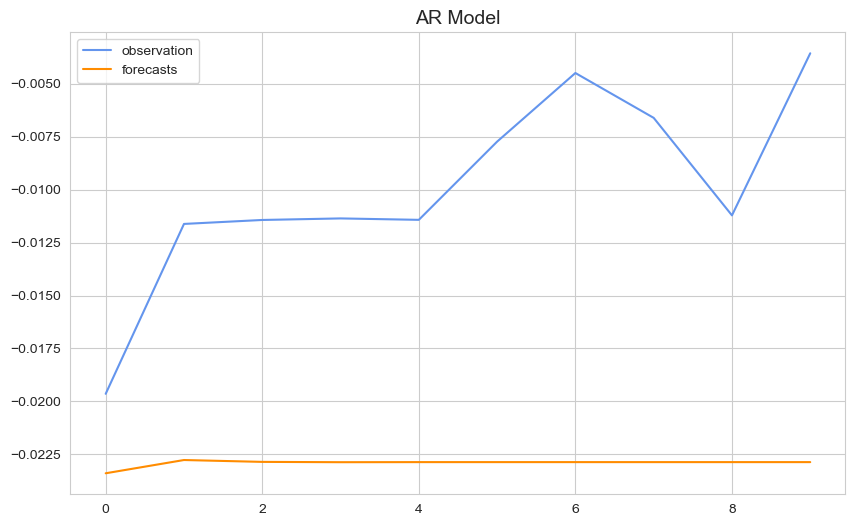

In [121]:
#plot the AR projections

plt.plot(test, label="observation",color="cornflowerblue")
plt.plot(predictions, label="forecasts",color="darkorange")
plt.title("AR Model", size=14)
plt.legend(loc="upper left")
plt.show()

In [122]:
model = ARIMA(train, order=(0,1,7))
MA_model = model.fit()

predictions = MA_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
ma_score = mean_squared_error(test, predictions)
print(f'MA MSE: {ma_score:.4}')

MA MSE: 2.21e-05


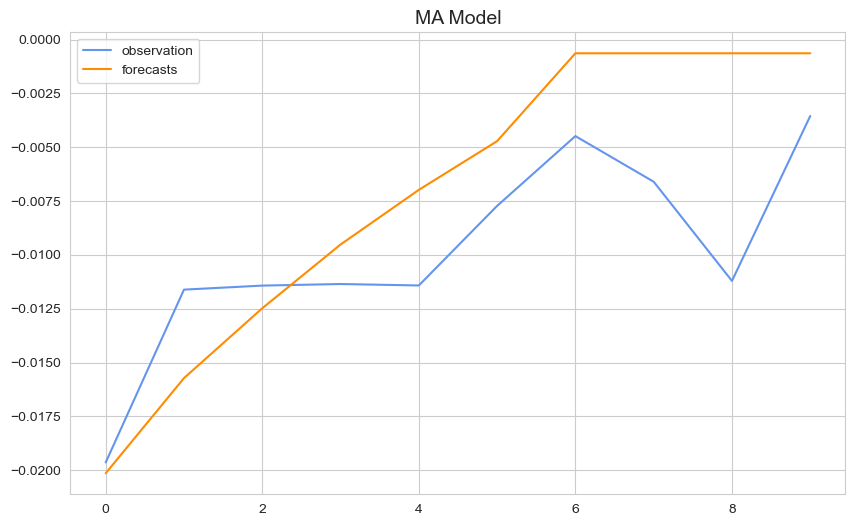

In [123]:
#plot the MA projections
 
plt.plot(test, label="observation",color="cornflowerblue")
plt.plot(predictions, label="forecasts",color="darkorange")
plt.title("MA Model", size=14)
plt.legend(loc="upper left")
plt.show()

In [124]:
model = ARIMA(train, order=(2,1,7))
ARIMA_model = model.fit()

predictions = ARIMA_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_score = mean_squared_error(test, predictions)
print(f'ARIMA MSE: {arima_score:.4}')


ARIMA MSE: 1.226e-05


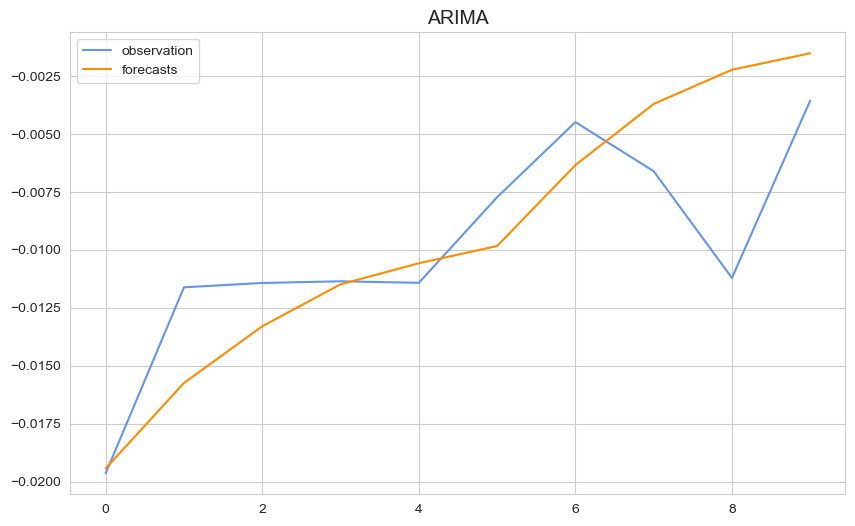

In [125]:
#plot the AR and MA Combined (ARIMA) projections
 
plt.plot(test, label="observation",color="cornflowerblue")
plt.plot(predictions, label="forecasts",color="darkorange")
plt.title("ARIMA", size=14)
plt.legend(loc="upper left")
plt.show()

# Model performance

In [126]:
errors = pd.DataFrame()
errors["Model"] = ["Autoregression", "Moving Average", "ARIMA"]
errors["MSE"] = [ar_score, ma_score, arima_score]
errors = errors.sort_values("MSE", ascending = True, ignore_index = True)
errors.index = errors.Model
del errors["Model"]

In [127]:
def coloring_bg(s, min_, max_, cmap='Reds', low=0, high=0):
    color_range = max_ - min_
    norm = colors.Normalize(min_ - (color_range * low), max_ + (color_range * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [128]:
def coloring_bg(s, min_, max_, cmap='Reds', low=0, high=0):
    color_range = max_ - min_
    norm = colors.Normalize(min_ - (color_range * low), max_ + (color_range * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [129]:
errors.style.apply(coloring_bg, min_ = errors.min().min(),

               max_ = errors.max().max(), low = 0.1, high = 0.85)
 

In [130]:
test_indexed_time = list(df_downsampled .iloc[len(indexed_df_log_scaled)-10:].index.values)

predictions_ARIMA_diff = pd.Series(predictions, test_indexed_time, copy=True)
print(predictions_ARIMA_diff.head())


2025-01-31 23:31:00   -0.019431
2025-02-01 02:26:00   -0.015744
2025-02-01 05:21:00   -0.013297
2025-02-01 08:16:00   -0.011486
2025-02-01 11:11:00   -0.010577
dtype: float64


In [131]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

2025-01-31 23:31:00   -0.019431
2025-02-01 02:26:00   -0.035175
2025-02-01 05:21:00   -0.048472
2025-02-01 08:16:00   -0.059958
2025-02-01 11:11:00   -0.070535
2025-02-01 14:06:00   -0.080367
2025-02-01 17:01:00   -0.086708
2025-02-01 19:56:00   -0.090410
2025-02-01 22:51:00   -0.092633
2025-02-02 01:46:00   -0.094147
dtype: float64


In [132]:
predictions_ARIMA_log = pd.Series(indexed_df_log_scaled['close'].iloc[len(indexed_df_log_scaled)-10:], index=test_indexed_time)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

2025-01-31 23:31:00    11.515296
2025-02-01 02:26:00    11.504634
2025-02-01 05:21:00    11.488600
2025-02-01 08:16:00    11.474125
2025-02-01 11:11:00    11.460574
dtype: float64

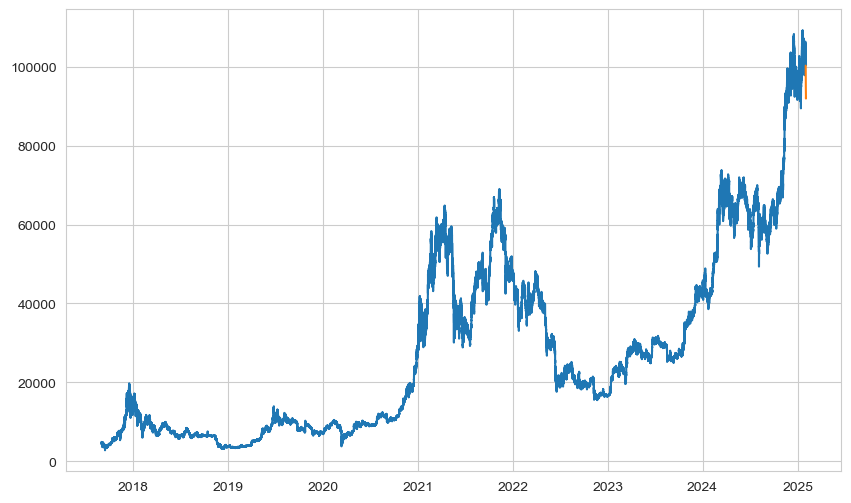

In [133]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_df['close'].iloc[len(indexed_df_log_scaled)-10:])
plt.plot(predictions_ARIMA)
plt.show()

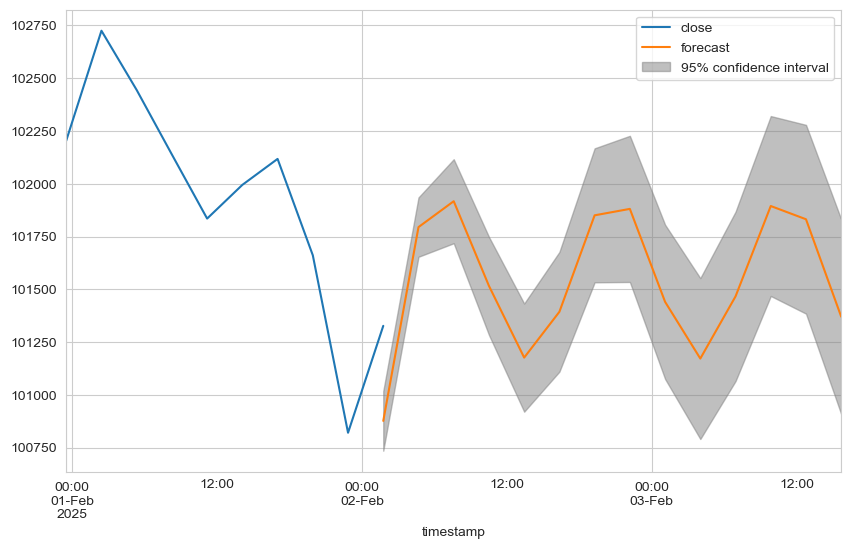

In [134]:
fig, ax = plt.subplots()
data = df_downsampled ['close'].iloc[len(indexed_df_log_scaled)-10:]
model_future = ARIMA(data, order=(2,1,2)).fit()
# ARIMA_model_future = model.fit()
ax = data.plot(ax=ax)
plot_predict(model_future, (len(data ))-1, (len(data ) + 12), ax=ax)
plt.show()